In [1]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

## Brought in DC csv 
*uppercased columns and added which universe the data is for*

In [3]:
dc_data = pd.read_csv('../data/dc-wikia-data.csv')
dc_data.head(1)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0


In [4]:
dc_data.columns = dc_data.columns.str.upper()

In [5]:
dc_data['universe'] = 'DC'
dc_data.head(1)

,PAGE_ID,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,universe
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0,DC


In [6]:
marvel_data = pd.read_csv('../data/marvel-wikia-data.csv')
marvel_data.head(1)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0


## Brought in Marvel csv 
*uppercased columns and added which universe the data is for*

In [8]:
marvel_data['universe'] = 'MARVEL'
marvel_data.head(1)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,universe
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0,MARVEL


In [9]:
marvel_data.columns = marvel_data.columns.str.upper()

In [10]:
both_df = pd.concat([dc_data, marvel_data])
both_df.head(1)

,PAGE_ID,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,universe,UNIVERSE
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0,DC,NaN


In [11]:
both_df['GSM'] = both_df['GSM'].fillna('Heterosexual Character')
both_df.head(1)

,PAGE_ID,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,universe,UNIVERSE
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Heterosexual Character,Living Characters,3093.0,"1939, May",1939.0,DC,NaN


In [12]:
both_df = both_df.drop('URLSLUG', axis=1)
both_df.head(1)

,PAGE_ID,NAME,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,universe,UNIVERSE
0,1422,Batman (Bruce Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Heterosexual Character,Living Characters,3093.0,"1939, May",1939.0,DC,NaN


In [13]:
both_df['APPEARANCES'] = both_df['APPEARANCES'].fillna(0)
both_df['APPEARANCES'] = both_df['APPEARANCES'].astype(int)
both_df

,PAGE_ID,NAME,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,universe,UNIVERSE
0,1422,Batman (Bruce Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Heterosexual Character,Living Characters,3093,"1939, May",1939.0,DC,NaN
1,23387,Superman (Clark Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Heterosexual Character,Living Characters,2496,"1986, October",1986.0,DC,NaN
2,1458,Green Lantern (Hal Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Heterosexual Character,Living Characters,1565,"1959, October",1959.0,DC,NaN
3,1659,James Gordon (New Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Heterosexual Character,Living Characters,1316,"1987, February",1987.0,DC,NaN
4,1576,Richard Grayson (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Heterosexual Character,Living Characters,1237,"1940, April",1940.0,DC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,Heterosexual Character,Living Characters,0,NaN,NaN,NaN,MARVEL
16372,665474,Thane (Thanos' son) (Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,Heterosexual Character,Living Characters,0,NaN,NaN,NaN,MARVEL
16373,695217,Tinkerer (Skrull) (Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,Heterosexual Character,Living Characters,0,NaN,NaN,NaN,MARVEL
16374,708811,TK421 (Spiderling) (Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,Heterosexual Character,Living Characters,0,NaN,NaN,NaN,MARVEL


In [14]:
top_20_heroes = both_df.groupby('NAME')['APPEARANCES'].sum().sort_values(ascending=False).head(10)
top_20_heroes = top_20_heroes[top_20_heroes.index != 'GenderTest']
top_20_heroes

NAME
Spider-Man (Peter Parker)              4043
Captain America (Steven Rogers)        3360
Batman (Bruce Wayne)                   3093
Wolverine (James \"Logan\" Howlett)    3061
Iron Man (Anthony \"Tony\" Stark)      2961
Superman (Clark Kent)                  2496
Thor (Thor Odinson)                    2258
Benjamin Grimm (Earth-616)             2255
Reed Richards (Earth-616)              2072
Hulk (Robert Bruce Banner)             2017
Name: APPEARANCES, dtype: int32

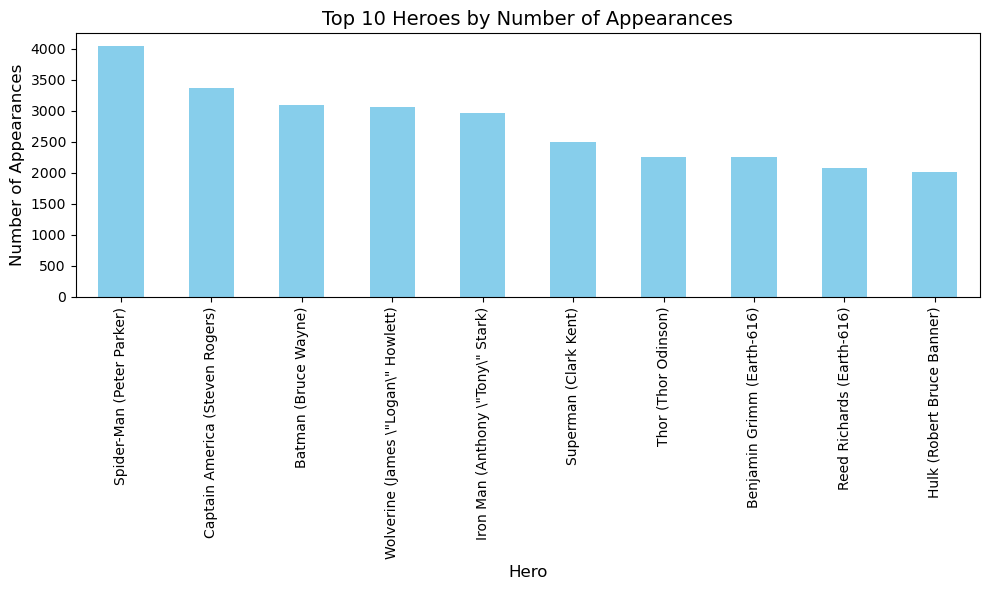

In [15]:
plt.figure(figsize=(10, 6)) 
top_20_heroes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Heroes by Number of Appearances', fontsize=14)
plt.xlabel('Hero', fontsize=12)
plt.ylabel('Number of Appearances', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('top_male_heros.png', transparent=True)
plt.show()

In [16]:
female_characters = both_df[both_df['SEX'] == 'Female Characters']
female_characters

,PAGE_ID,NAME,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,universe,UNIVERSE
5,1448,Wonder Woman (Diana Prince),Public Identity,Good Characters,Blue Eyes,Black Hair,Female Characters,Heterosexual Character,Living Characters,1231,"1941, December",1941.0,DC,NaN
8,71760,Dinah Laurel Lance (New Earth),Public Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,Heterosexual Character,Living Characters,1075,"1969, November",1969.0,DC,NaN
10,403631,GenderTest,Secret Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,Heterosexual Character,Living Characters,1028,"1956, October",1956.0,DC,NaN
12,1905,Barbara Gordon (New Earth),Secret Identity,Good Characters,Blue Eyes,Red Hair,Female Characters,Heterosexual Character,Living Characters,951,"1967, January",1967.0,DC,NaN
14,23383,Lois Lane (New Earth),Public Identity,Good Characters,Blue Eyes,Black Hair,Female Characters,Heterosexual Character,Living Characters,934,"1938, June",1938.0,DC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16361,713903,Dante's mother (Earth-616),No Dual Identity,Neutral Characters,NaN,NaN,Female Characters,Heterosexual Character,Deceased Characters,0,NaN,NaN,NaN,MARVEL
16362,508693,Farbauti (Earth-616),Public Identity,Bad Characters,Red Eyes,NaN,Female Characters,Heterosexual Character,Living Characters,0,NaN,NaN,NaN,MARVEL
16366,643435,Karen (Hijack's girlfriend) (Earth-616),Public Identity,Neutral Characters,Brown Eyes,Black Hair,Female Characters,Heterosexual Character,Living Characters,0,NaN,NaN,NaN,MARVEL
16368,703892,Marcy (Offer's employee) (Earth-616),Public Identity,Neutral Characters,NaN,Brown Hair,Female Characters,Heterosexual Character,Living Characters,0,NaN,NaN,NaN,MARVEL


In [17]:
female_characters = female_characters.groupby('NAME')['APPEARANCES'].sum().sort_values(ascending=False).head(10)
female_characters

NAME
Susan Storm (Earth-616)           1713
Ororo Munroe (Earth-616)          1512
Mary Jane Watson (Earth-616)      1304
Wonder Woman (Diana Prince)       1231
Wanda Maximoff (Earth-616)        1161
Janet van Dyne (Earth-616)        1120
Jean Grey (Earth-616)             1107
Dinah Laurel Lance (New Earth)    1075
Natalia Romanova (Earth-616)      1050
GenderTest                        1028
Name: APPEARANCES, dtype: int32

In [18]:
female_characters = female_characters[female_characters.index != 'GenderTest']

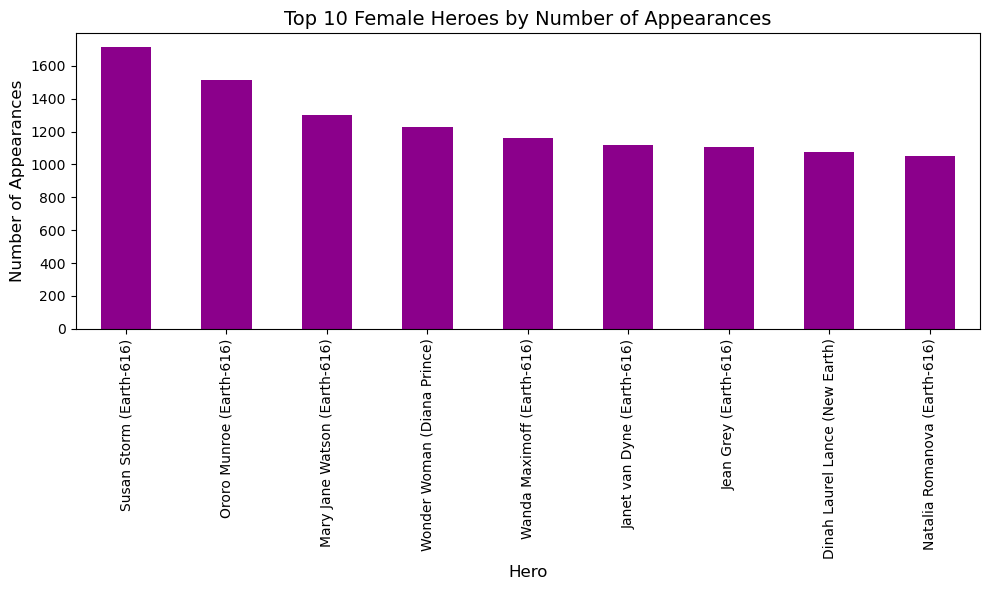

In [19]:
plt.figure(figsize=(10, 6)) 
female_characters.plot(kind='bar', color='darkmagenta')
plt.title('Top 10 Female Heroes by Number of Appearances', fontsize=14)
plt.xlabel('Hero', fontsize=12)
plt.ylabel('Number of Appearances', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('top_females.png', transparent=True)
plt.show()

In [20]:
alignment_counts = both_df['ALIGN'].value_counts()
alignment_counts

ALIGN
Bad Characters        9615
Good Characters       7468
Neutral Characters    2773
Reformed Criminals       3
Name: count, dtype: int64

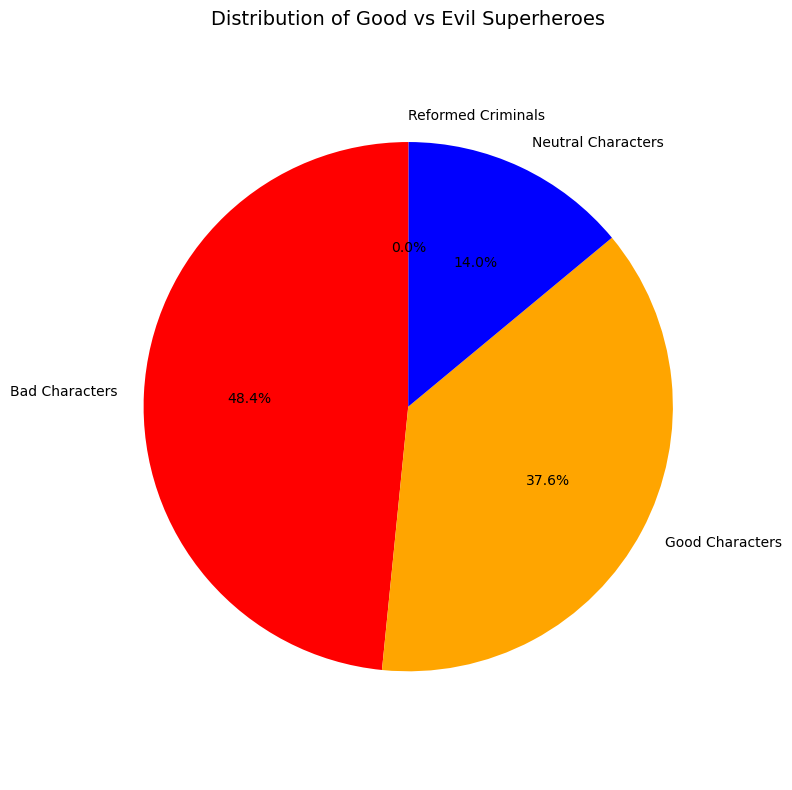

In [21]:
plt.figure(figsize=(8, 8))
plt.pie(alignment_counts, labels=alignment_counts.index, autopct='%1.1f%%', colors=['red', 'orange', 'blue'], startangle=90)
plt.title('Distribution of Good vs Evil Superheroes', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [77]:
male_heroes = both_df[both_df['SEX'] == 'Male Characters']
male_alignment_counts = male_heroes['ALIGN'].value_counts()
male_alignment_counts

ALIGN
Bad Characters        7561
Good Characters       4809
Neutral Characters    1799
Reformed Criminals       2
Name: count, dtype: int64

In [81]:
top_three_alignments = male_alignment_counts.head(3)
top_three_alignments

ALIGN
Bad Characters        7561
Good Characters       4809
Neutral Characters    1799
Name: count, dtype: int64

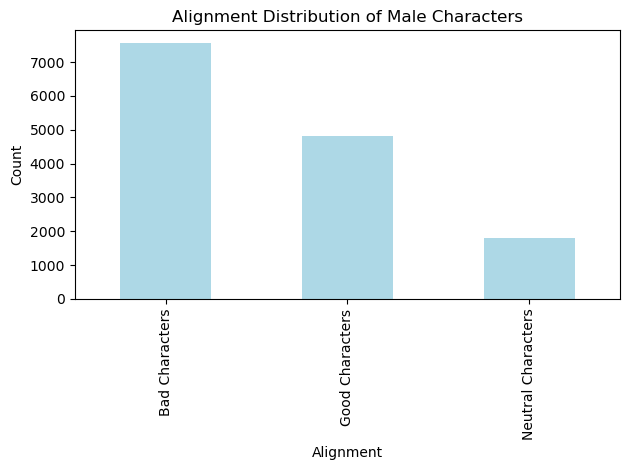

In [85]:
top_three_alignments.plot(kind='bar', color='lightblue')
plt.xlabel('Alignment')
plt.ylabel('Count')
plt.title('Alignment Distribution of Male Characters')
plt.tight_layout()
plt.savefig('alignment_male.png', transparent=True)
plt.show()

In [24]:
female_heroes = both_df[both_df['SEX'] == 'Female Characters']
female_alignment_counts = female_heroes['ALIGN'].value_counts()
female_alignment_counts

ALIGN
Good Characters       2490
Bad Characters        1573
Neutral Characters     836
Name: count, dtype: int64

In [87]:
top_three_alignments2 = female_alignment_counts.head(3)
top_three_alignments2

ALIGN
Good Characters       2490
Bad Characters        1573
Neutral Characters     836
Name: count, dtype: int64

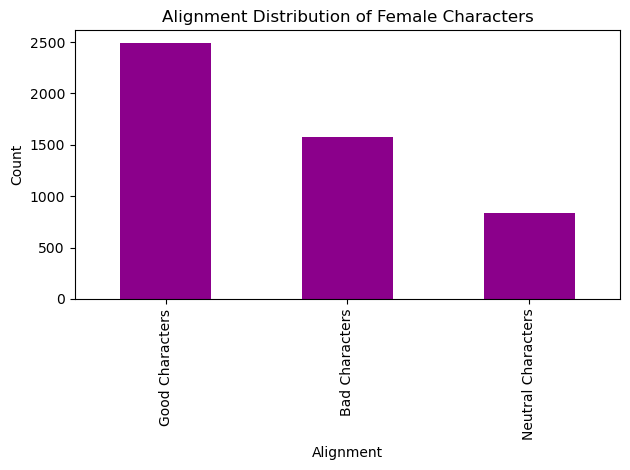

In [89]:
top_three_alignments2.plot(kind='bar', color='darkmagenta')
plt.xlabel('Alignment')
plt.ylabel('Count')
plt.title('Alignment Distribution of Female Characters')
plt.tight_layout()
plt.savefig('good_evil_female.png', transparent=True)
plt.show()

In [26]:
both_df['GSM'] = both_df['GSM'].replace('Transvestites', 'Transgender Characters')
both_df['GSM'].value_counts()

GSM
Heterosexual Character    23118
Homosexual Characters       120
Bisexual Characters          29
Transgender Characters        3
Pansexual Characters          1
Genderfluid Characters        1
Name: count, dtype: int64

In [27]:
debut_years = both_df.groupby('GSM')['YEAR'].min().reset_index()
debut_years

,GSM,YEAR
0,Bisexual Characters,1943.0
1,Genderfluid Characters,2005.0
2,Heterosexual Character,1935.0
3,Homosexual Characters,1940.0
4,Pansexual Characters,1984.0
5,Transgender Characters,1991.0


In [28]:
debut_years_sorted = debut_years.sort_values(by='YEAR')
debut_years_sorted

,GSM,YEAR
2,Heterosexual Character,1935.0
3,Homosexual Characters,1940.0
0,Bisexual Characters,1943.0
4,Pansexual Characters,1984.0
5,Transgender Characters,1991.0
1,Genderfluid Characters,2005.0


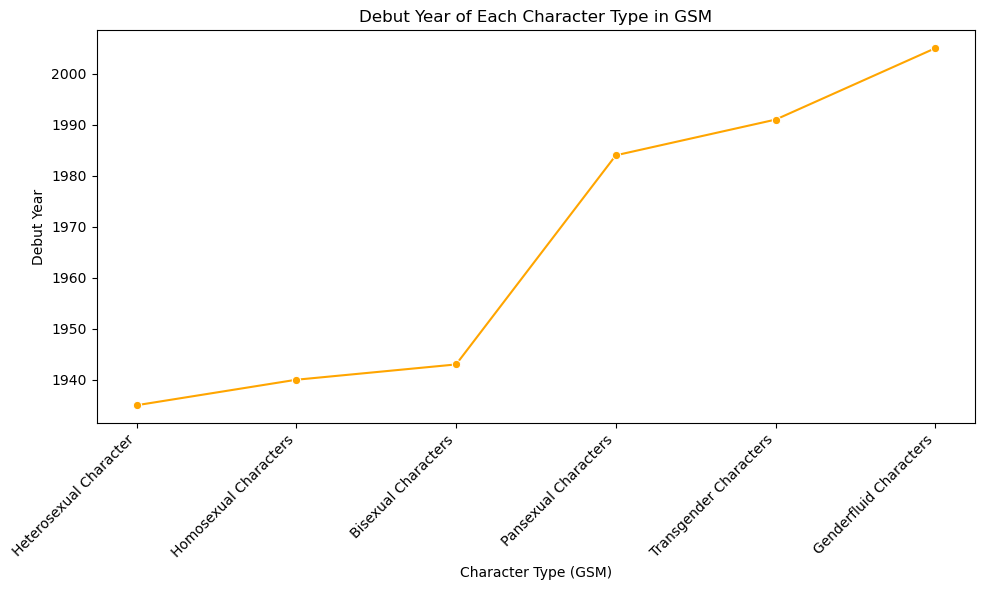

In [29]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=debut_years_sorted, x='GSM', y='YEAR', marker='o', linestyle='-', color='orange')
plt.title('Debut Year of Each Character Type in GSM')
plt.xlabel('Character Type (GSM)')
plt.ylabel('Debut Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('gsm.png', transparent=True)
plt.show()

In [30]:
gender_counts = both_df.groupby(['GSM', 'SEX']).size().reset_index(name='Count')
gender_counts

,GSM,SEX,Count
0,Bisexual Characters,Female Characters,18
1,Bisexual Characters,Genderfluid Characters,1
2,Bisexual Characters,Genderless Characters,1
3,Bisexual Characters,Male Characters,9
4,Genderfluid Characters,Genderfluid Characters,1
5,Heterosexual Character,Agender Characters,45
6,Heterosexual Character,Female Characters,5735
7,Heterosexual Character,Genderless Characters,19
8,Heterosexual Character,Male Characters,16339
9,Heterosexual Character,Transgender Characters,1


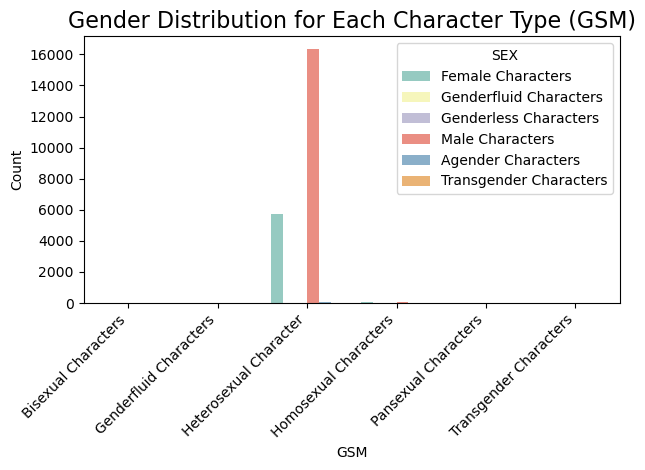

In [31]:
sns.barplot(data=gender_counts, x='GSM', y='Count', hue='SEX', palette='Set3')
plt.title('Gender Distribution for Each Character Type (GSM)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('gsm_type.png', transparent=True)
plt.show()

In [32]:
gender_summary = both_df.groupby('SEX').size().reset_index(name='Count')
gender_summary

,SEX,Count
0,Agender Characters,45
1,Female Characters,5804
2,Genderfluid Characters,2
3,Genderless Characters,20
4,Male Characters,16421
5,Transgender Characters,1


In [33]:
female_heroes = both_df[both_df['SEX'] == 'Female Characters']
girl_heroes = female_heroes[female_heroes['NAME'].str.contains('girl', case=False, na=False)]
count_girl_heroes = girl_heroes.shape[0]
count_girl_heroes

25

In [34]:
woman_heroes = both_df[both_df['SEX'] == 'Female Characters']
woman_heroes = woman_heroes[woman_heroes['NAME'].str.contains('woman', case=False, na=False)]
count_woman_heroes = woman_heroes.shape[0]
count_woman_heroes

12

In [35]:
male_heroes = both_df[both_df['SEX'] == 'Male Characters']
filtered_male_heroes = male_heroes[~male_heroes['NAME'].str.contains(r'\bboylan\b|\bboyd\b|\bboyle\b', case=False, na=False)]
boy_heroes = filtered_male_heroes[filtered_male_heroes['NAME'].str.contains(r'\bboy\b', case=False, na=False)]
count_boy_heroes = boy_heroes.shape[0]
count_boy_heroes

16

In [36]:
man_heroes = both_df[both_df['SEX'] == 'Male Characters']
man_heroes = man_heroes[man_heroes['NAME'].str.contains('man', case=False, na=False)]
count_man_heroes = man_heroes.shape[0]
count_man_heroes

567